# Intro IA - 2coCEIA2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Funciones, visualización y split del dataset:

In [2]:
import sys  
sys.path.insert(0, r'C:\Users\MarianelSarabia\Dropbox (Personal)\b_DataSc\_CEIA_FIUBA\IA\ia_examen')
#sys.path.insert(0, r'C:\Users\MarianelSarabia\Downloads\ia')

In [3]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    @staticmethod
    def _build_dataset(path):
        structure = [('entrada', np.float),
                     ('salida', np.float)]
        with open(path, encoding="utf8") as data_csv:
            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1]))
                        for i, line in enumerate(data_csv))
            data = np.fromiter(data_gen, structure)
        return data

    def split(self, percentage):  
        X = self.dataset['entrada']
        y = self.dataset['salida']
        permuted_idxs = np.random.permutation(X.shape[0])
        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
        X_train = X[train_idxs]
        X_test = X[test_idxs]
        y_train = y[train_idxs]
        y_test = y[test_idxs]
        return X_train, X_test, y_train, y_test

In [4]:
## levantar los datos
dataset = Data(r'clase_8_dataset.csv')

In [5]:
#split del dataset
X_train, X_test, y_train, y_test = dataset.split(0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400,), (100,), (400,), (100,))

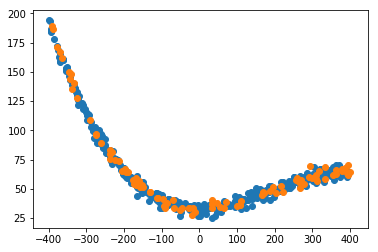

In [6]:
#ploteo del dataset
plt.scatter(X_train, y_train+15);
plt.scatter(X_test, y_test+15);

## 3. Regresión polinómica (lineal en parámetros, con features polinómicas)

In [7]:
class BaseModel(object):
    def __init__(self):
        self.model = None
    def fit(self, X, Y):
        return NotImplemented
    def predict(self, X):
        return NotImplemented

class ConstantModel(BaseModel):
    def fit(self, X, Y):
        W = Y.mean()
        self.model = W
    def predict(self, X):
        return np.ones(len(X)) * self.model

class LinearRegression(BaseModel):
    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W
    def predict(self, X):
        return self.model * X

In [8]:
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented

class MSE(Metric): # error cuadrático medio, MSE por sus siglas en inglés
    def __init__(self):
        Metric.__init__(self)
    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

In [9]:
X_train1 = np.vstack((X_train, np.ones(len(X_train)))).T
X_train2 = np.vstack((X_train, np.power(X_train, 2), np.ones(len(X_train)))).T
X_train3 = np.vstack((X_train, np.power(X_train, 2), np.power(X_train, 3), np.ones(len(X_train)))).T
X_train4 = np.vstack((X_train, np.power(X_train, 2), np.power(X_train, 3), np.power(X_train, 4), np.ones(len(X_train)))).T

X_test1 = np.vstack((X_test, np.ones(len(X_test)))).T
X_test2 = np.vstack((X_test, np.power(X_test, 2), np.ones(len(X_test)))).T
X_test3 = np.vstack((X_test, np.power(X_test, 2), np.power(X_test, 3), np.ones(len(X_test)))).T
X_test4 = np.vstack((X_test, np.power(X_test, 2), np.power(X_test, 3), np.power(X_test, 4), np.ones(len(X_test)))).T

X_train1.shape, X_train2.shape, X_train3.shape, X_train4.shape

((400, 2), (400, 3), (400, 4), (400, 5))

### 3.i. Modelos generales (previa a implementación de k-folds) 

In [10]:
# instancio las clases
linear_regression = LinearRegression()
mse = MSE()

A continuación se presentan los modelos, se usará una regresión lineal con features polinómicas, incrementando el grado (n) hasta 3

In [11]:
linear_regression.fit(X_train, y_train)
lr_y_hat = linear_regression.predict(X_test)
lr_mse = mse(y_test, lr_y_hat)

In [12]:
# modelo con intercepto (ordenada al origen, b0_hat = 0)
print('modelo lineal sin intercepto:')
print('b1_hat:', linear_regression.model)
print('MSE:', lr_mse)

modelo lineal sin intercepto:
b1_hat: -0.09067571039916722
MSE: 3588.79779750014


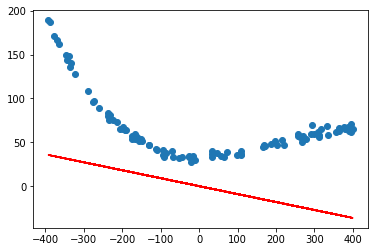

In [13]:
plt.scatter(X_test, y_test +15 );
plt.plot(X_test, lr_y_hat, 'r');

In [14]:
linear_regression.fit(X_train1, y_train.reshape(-1,1))
lr1_y_hat = X_test1 @ linear_regression.model
lr1_mse = mse(y_test, lr1_y_hat)

In [15]:
# modelo con intercepto (ordenada al origen, b0_hat != 0)
print('modelo lineal con intercepto, n=1:\n')
print('b0_hat:', linear_regression.model[-1], '+\n xn1_i * b1_hat:', linear_regression.model[0], '\n')
print('MSE:', lr1_mse, '\n')
print('y_test_avg:', y_test.mean(), 'std:', y_test.std(),
      '\ny_est_n1_avg:', lr1_y_hat.mean(), 'std:', lr1_y_hat.std())

modelo lineal con intercepto, n=1:

b0_hat: [48.93217813] +
 xn1_i * b1_hat: [-0.08451802] 

MSE: 172689.21537870367 

y_test_avg: 50.45425627080404 std: 36.144015066103414 
y_est_n1_avg: 48.35442333531615 std: 20.39835852051255


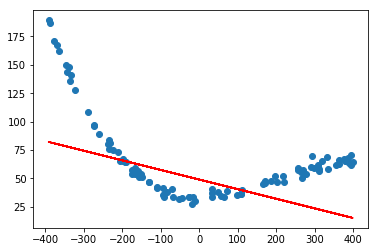

In [16]:
plt.scatter(X_test, y_test +15 );
plt.plot(X_test, lr1_y_hat, 'r');

In [17]:
linear_regression.fit(X_train2, y_train.reshape(-1,1))
lr2_y_hat = X_test2 @ linear_regression.model
lr2_mse = mse(y_test, lr2_y_hat)

In [18]:
# modelo con intercepto, feature polinómina de grado n=2
print('modelo lineal con intercepto, n=2:\n')
print('b0_hat:', linear_regression.model[-1], '+\n xn1_i * b1_hat:', linear_regression.model[0],
      '+\n xn2_i * b2_hat:', linear_regression.model[1], '\n')
print('MSE:', lr2_mse, '\n')
print('y_test_avg:', y_test.mean(), 'std:', y_test.std(),
      '\ny_est_n2_avg:', lr2_y_hat.mean(), 'std:', lr2_y_hat.std())

modelo lineal con intercepto, n=2:

b0_hat: [17.12159989] +
 xn1_i * b1_hat: [-0.09113089] +
 xn2_i * b2_hat: [0.00060089] 

MSE: 241235.01102681388 

y_test_avg: 50.45425627080404 std: 36.144015066103414 
y_est_n2_avg: 51.528114118750366 std: 33.23863887844737


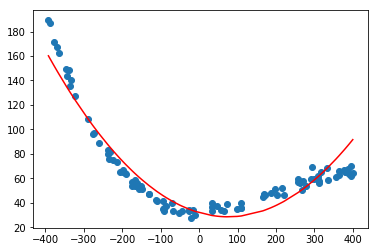

In [19]:
plt.scatter(X_test, y_test +15 );
plt.plot(X_test[np.argsort(X_test)], lr2_y_hat[np.argsort(X_test)] +15, c='r');

In [20]:
linear_regression.fit(X_train3, y_train.reshape(-1,1))
lr3_y_hat = X_test3 @ linear_regression.model
lr3_mse = mse(y_test, lr3_y_hat)

In [21]:
# modelo con intercepto, feature polinómina de grado n=3
print('modelo lineal con intercepto, n=3:\n')
print('b0_hat:', linear_regression.model[-1], '+\n xn1_i * b1_hat:', linear_regression.model[0],
      '+\n xn2_i * b2_hat:', linear_regression.model[1], '+\n xn3_i * b3_hat:', linear_regression.model[2], '\n')
print('MSE:', lr3_mse, '\n')
print('y_test_avg:', y_test.mean(), 'std:', y_test.std(),
      '\ny_est_n3_avg:', lr3_y_hat.mean(), 'std:', lr3_y_hat.std())

modelo lineal con intercepto, n=3:

b0_hat: [18.00509133] +
 xn1_i * b1_hat: [0.00148404] +
 xn2_i * b2_hat: [0.00060022] +
 xn3_i * b3_hat: [-1.01150143e-06] 

MSE: 257062.1026219696 

y_test_avg: 50.45425627080404 std: 36.144015066103414 
y_est_n3_avg: 50.12071719623102 std: 35.55446459738522


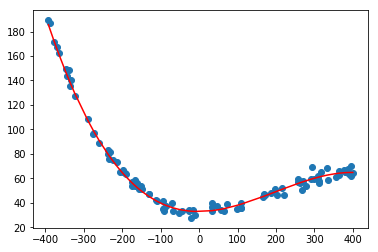

In [22]:
plt.scatter(X_test, y_test +15 );
plt.plot(X_test[np.argsort(X_test)], lr3_y_hat[np.argsort(X_test)] +15, c='r');

In [23]:
linear_regression.fit(X_train4, y_train.reshape(-1,1))
lr4_y_hat = X_test4 @ linear_regression.model
lr4_mse = mse(y_test, lr4_y_hat)

In [24]:
# modelo con intercepto, feature polinómina de grado n=4
print('modelo lineal con intercepto, n=4:\n')
print('b0_hat:', linear_regression.model[-1], '+\n xn1_i * b1_hat:', linear_regression.model[0],
      '+\n xn2_i * b2_hat:', linear_regression.model[1], '+\n xn3_i * b3_hat:', linear_regression.model[2], 
      '+\n xn4_i * b4_hat:', linear_regression.model[3], '\n')
print('MSE:', lr4_mse, '\n')
print('y_test_avg:', y_test.mean(), 'std:', y_test.std(),
      '\ny_est_n4_avg:', lr4_y_hat.mean(), 'std:', lr4_y_hat.std())

modelo lineal con intercepto, n=4:

b0_hat: [17.83252397] +
 xn1_i * b1_hat: [0.00158835] +
 xn2_i * b2_hat: [0.0006108] +
 xn3_i * b3_hat: [-1.01232496e-06] +
 xn4_i * b4_hat: [-7.9820712e-11] 

MSE: 256915.41141333533 

y_test_avg: 50.45425627080404 std: 36.144015066103414 
y_est_n4_avg: 50.095338446702 std: 35.53358224314268


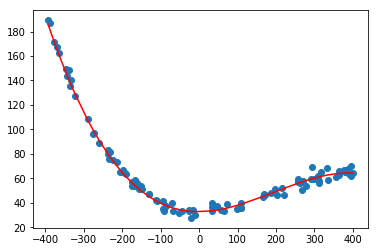

In [25]:
plt.scatter(X_test, y_test +15 );
plt.plot(X_test[np.argsort(X_test)], lr4_y_hat[np.argsort(X_test)] +15, c='r');

In [26]:
# comparación de resultados para un observación
print(X_test[1], [round(i,4) for i in X_test1[1,:]], lr1_y_hat[1])
print(X_test[1], [round(i,4) for i in X_test2[1,:]], lr2_y_hat[1])
print(X_test[1], [round(i,4) for i in X_test3[1,:]], lr3_y_hat[1])
print(X_test[1], [round(i,4) for i in X_test4[1,:]], lr4_y_hat[1], y_test[1])

-345.5118586102055 [-345.5119, 1.0] [78.13415503]
-345.5118586102055 [-345.5119, 119378.4444, 1.0] [120.34147281]
-345.5118586102055 [-345.5119, 119378.4444, -41246668.2166, 1.0] [130.86721304]
-345.5118586102055 [-345.5119, 119378.4444, -41246668.2166, 14251212996.9807, 1.0] [130.81811071] 134.5084802748143


In [27]:
# conjuntos de datos y resultados generales
train = [X_train, X_train1, X_train2, X_train3, X_train4]
test = [X_test, X_test1, X_test2, X_test3, X_test4]
y_hat = [lr_y_hat, lr1_y_hat, lr2_y_hat, lr3_y_hat, lr4_y_hat]
mse_hat = [lr_mse, lr1_mse, lr2_mse, lr3_mse, lr4_mse]

### 3.ii. Implementación de k-forlds para la evaluación y selección de modelos

In [28]:
def k_folds(X_train, y_train, X_test, y_test, k=5):
    linear_regression = LinearRegression()
    mse = MSE()

    chunk_size = int(len(X_train) / k)
    model_list = []
    mse_validation = []
    mse_test = []

    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        linear_regression.fit(new_X_train, new_y_train)
        model_list.append(linear_regression.model)
        
        lr_y_hat_validation = new_X_valid @ linear_regression.model
        mse_validation.append(mse(new_y_valid, lr_y_hat_validation))

        lr_y_hat = X_test @ linear_regression.model
        mse_test.append(mse(y_test, lr_y_hat))

    # El criterio de decisión para elegir el mejor modelo se basa en el error cuadrático medio (MSE):
    # El mejor modelo es el que menor MSE arroja en el testeo de las estimaciones.
    
    # También puede haber instancias de validación que arrojan un MSE previas al testeo 
    # (por ej. cuando se implementa k-folds, cross validation y/o grid search)
    
    # En este caso, se puede usar el MSE promedio para 
    # Si elegimos como mejor modelo con menor MSE en la validación,
    # al corroborar el modelo con el set de test, el ranking de MSEs puede diferir sutilmente, 
    # dado que se pueden generar ajustes asociados al trade-off sesgo-varianza y, por lo tanto, al overfitting.
    # En este caso, una aproximación general para comparar estructura de los modelos 
    # (por ej, grado del polinomio a priorizar) más que los parámetros estimados en sí, 
    # se puede utilizar el promedio de los MSE de validación y/o de los MSE de testeo de cada modelo de grado n 
    # a fin de contemplar una medida más robusta de variabilidad.
    
    print('Habiendo registrado el menor MSE en el testeo,', np.min(mse_test), 
          '\nel mejor modelo es el de la ', 1 + np.argsort(mse_test)[0], '° partición' 
          '\ncon parámetros lineales estimados según bi (i=1,... n) y b0:', model_list[np.argsort(mse_test)[0]], 
          '\npara features polínómicas xi de grado n=', linear_regression.model.shape[0] - 1, '\n' )
    
    return model_list, mse_validation, mse_test

In [29]:
# n=1 sin intercepto
#model_list, mse_validation, mse_test = k_folds(X_train, y_train, X_test, y_test, k=5)

# n=1
model_list1, mse_validation1, mse_test1 = k_folds(X_train1, y_train, X_test1, y_test, k=5)
# n=2
model_list2, mse_validation2, mse_test2 = k_folds(X_train2, y_train, X_test2, y_test, k=5)
# n=3
model_list3, mse_validation3, mse_test3 = k_folds(X_train3, y_train, X_test3, y_test, k=5)
# n=4
model_list4, mse_validation4, mse_test4 = k_folds(X_train4, y_train, X_test4, y_test, k=5)

Habiendo registrado el menor MSE en el testeo, 972.810680852388 
el mejor modelo es el de la  1 ° partición
con parámetros lineales estimados según bi (i=1,... n) y b0: [-0.07969824 48.9858178 ] 
para features polínómicas xi de grado n= 1 

Habiendo registrado el menor MSE en el testeo, 122.00227066565222 
el mejor modelo es el de la  2 ° partición
con parámetros lineales estimados según bi (i=1,... n) y b0: [-9.25642893e-02  5.94126298e-04  1.78137550e+01] 
para features polínómicas xi de grado n= 2 

Habiendo registrado el menor MSE en el testeo, 9.015015047020286 
el mejor modelo es el de la  2 ° partición
con parámetros lineales estimados según bi (i=1,... n) y b0: [ 6.28678501e-04  6.00059782e-04 -1.00906249e-06  1.81437026e+01] 
para features polínómicas xi de grado n= 3 

Habiendo registrado el menor MSE en el testeo, 9.061575715354842 
el mejor modelo es el de la  2 ° partición
con parámetros lineales estimados según bi (i=1,... n) y b0: [ 6.74221432e-04  6.05774810e-04 -1.0093

In [30]:
# mejor tipo de modelo
MSE_val = np.vstack((mse_validation1, mse_validation2, mse_validation3, mse_validation4)).T.mean(0)
MSE_test = np.vstack((mse_test1, mse_test2, mse_test3, mse_test4)).T.mean(0)

print('Con el menor MSE promedio resultante de la validación:', np.min(MSE_val), 
      '\nel mejor tipo de modelo es el de grado n= ', 1 + np.argsort(MSE_val)[0])

print('Con el menor MSE promedio resultante del testeo:', np.min(MSE_test), 
      '\nel mejor tipo de modelo es el de grado n= ', 1 + np.argsort(MSE_test)[0])

Con el menor MSE promedio resultante de la validación: 9.875106112503268 
el mejor tipo de modelo es el de grado n=  3
Con el menor MSE promedio resultante del testeo: 9.205531419324604 
el mejor tipo de modelo es el de grado n=  3


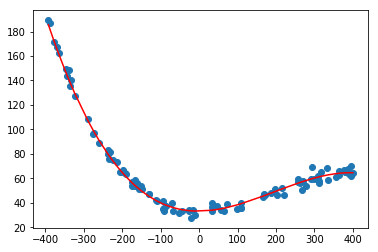

In [31]:
# mejor modelo => con features polinómicas de grado n=3
# mejor modelo dentro de esa clase, 4° partición (index: 4-1 = 3)

y_hat3 = X_test3 @ model_list3[3]
plt.scatter(X_test, y_test +15 );
plt.plot(X_test[np.argsort(X_test)], y_hat3[np.argsort(X_test)] +15, c='r');